In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
data = pd.read_excel('C:/Users/Aravind/PROJECTS/Milky-way-of-Deep-Learning/Milky-way-of-Deep-Learning/data/external/full_dataset.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Columns: 1061 entries, Diet to col1060
dtypes: float64(1060), object(1)
memory usage: 26.5+ MB


In [5]:
data.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col1051,col1052,col1053,col1054,col1055,col1056,col1057,col1058,col1059,col1060
count,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,...,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000,3275.000000
mean,1.224632,1.212087,1.200541,1.189475,1.178933,1.168909,1.159350,1.150042,1.140407,1.129354,...,0.932007,0.932392,0.932800,0.933222,0.933647,0.934065,0.934470,0.934752,0.935129,0.935495
std,0.109307,0.107605,0.106066,0.104590,0.103169,0.101799,0.100490,0.099248,0.098046,0.096797,...,0.081245,0.081268,0.081293,0.081320,0.081349,0.081377,0.081405,0.081425,0.081454,0.081482
min,0.200451,0.197335,0.194482,0.191707,0.189006,0.186321,0.183667,0.180993,0.178249,0.175389,...,0.138458,0.138519,0.138579,0.138643,0.138712,0.138791,0.138879,0.138947,0.139043,0.139136
25%,1.201450,1.190346,1.180232,1.170511,1.161068,1.152576,1.144497,1.136638,1.128281,1.118568,...,0.923167,0.923471,0.923841,0.924323,0.924724,0.925075,0.925458,0.925821,0.926208,0.926546
50%,1.233044,1.220362,1.208841,1.197907,1.187339,1.177197,1.167856,1.158518,1.148715,1.137601,...,0.942554,0.942928,0.943285,0.943683,0.944053,0.944540,0.944912,0.945188,0.945576,0.945943
75%,1.263995,1.249970,1.236811,1.224258,1.212192,1.200616,1.189460,1.178745,1.168039,1.155896,...,0.958992,0.959360,0.959762,0.960177,0.960570,0.960999,0.961418,0.961694,0.962166,0.962636
max,1.489349,1.463645,1.440033,1.416911,1.393804,1.370367,1.346619,1.322929,1.299676,1.276790,...,0.999816,0.999555,0.999317,0.999167,0.999121,0.999148,0.999596,1.000010,1.000674,1.001356


In [6]:
data.head()

,Diet,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col1051,col1052,col1053,col1054,col1055,col1056,col1057,col1058,col1059,col1060
0,GRS,1.285407,1.270682,1.256961,1.243545,1.230510,1.217927,1.205841,1.194133,1.182280,...,0.953018,0.953452,0.953923,0.954405,0.954882,0.955351,0.955824,0.956178,0.956678,0.957184
1,GRS,1.184143,1.174105,1.164920,1.156222,1.148060,1.140399,1.133123,1.125951,1.118246,...,0.978003,0.978359,0.978767,0.979192,0.979599,0.979972,0.980313,0.980553,0.980892,0.981262
2,GRS,1.367154,1.348666,1.331992,1.315673,1.299387,1.283017,1.266661,1.250464,1.234278,...,0.919751,0.920195,0.920649,0.921126,0.921624,0.922130,0.922627,0.922959,0.923418,0.923863
3,GRS,1.204441,1.193640,1.183685,1.174031,1.164706,1.155768,1.147259,1.139031,1.130472,...,0.972673,0.973021,0.973390,0.973784,0.974206,0.974654,0.975121,0.975456,0.975953,0.976483
4,GRS,1.280609,1.264384,1.250152,1.237041,1.224849,1.213294,1.202137,1.191109,1.179676,...,0.958123,0.958400,0.958773,0.959264,0.959864,0.960536,0.961223,0.961681,0.962278,0.962797


In [7]:
data['Diet'].describe()

count     3275
unique       3
top        CLV
freq      1120
Name: Diet, dtype: object

In [8]:
data['Diet'].value_counts()

Diet
CLV    1120
GRS    1094
TMR    1061
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[['Diet']] = encoder.fit_transform(data[['Diet']])

In [10]:
X = data.drop(['Diet'] , axis=1)
y = data['Diet']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten())
for layer in range(10):
    model1.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model1.add(tf.keras.layers.Dense(3, activation="softmax"))

In [13]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [14]:
history1 = model1.fit(X_train ,  y_train, epochs=20)

Epoch 1/20
82/82 [==============================] - 1s 1ms/step - loss: 1.1275 - accuracy: 0.3214
Epoch 2/20
82/82 [==============================] - 0s 1ms/step - loss: 1.1032 - accuracy: 0.3385
Epoch 3/20
82/82 [==============================] - 0s 1ms/step - loss: 1.1024 - accuracy: 0.3462
Epoch 4/20
82/82 [==============================] - 0s 1ms/step - loss: 1.1019 - accuracy: 0.3363
Epoch 5/20
82/82 [==============================] - 0s 1ms/step - loss: 1.1023 - accuracy: 0.3294
Epoch 6/20
82/82 [==============================] - 0s 1ms/step - loss: 1.1005 - accuracy: 0.3454
Epoch 7/20
82/82 [==============================] - 0s 1ms/step - loss: 1.0998 - accuracy: 0.3370
Epoch 8/20
82/82 [==============================] - 0s 1ms/step - loss: 1.1014 - accuracy: 0.3309
Epoch 9/20
82/82 [==============================] - 0s 1ms/step - loss: 1.1002 - accuracy: 0.3214
Epoch 10/20
82/82 [==============================] - 0s 1ms/step - loss: 1.1011 - accuracy: 0.3344
Epoch 11/20
82/82 [

In [15]:
score = model1.evaluate(X_test, y_test)
print('Test Accuracy : {:.4f} %'.format(score[1]*100))

21/21 [==============================] - 0s 1ms/step - loss: 1.0990 - accuracy: 0.3450
Test Accuracy : 34.5038 %


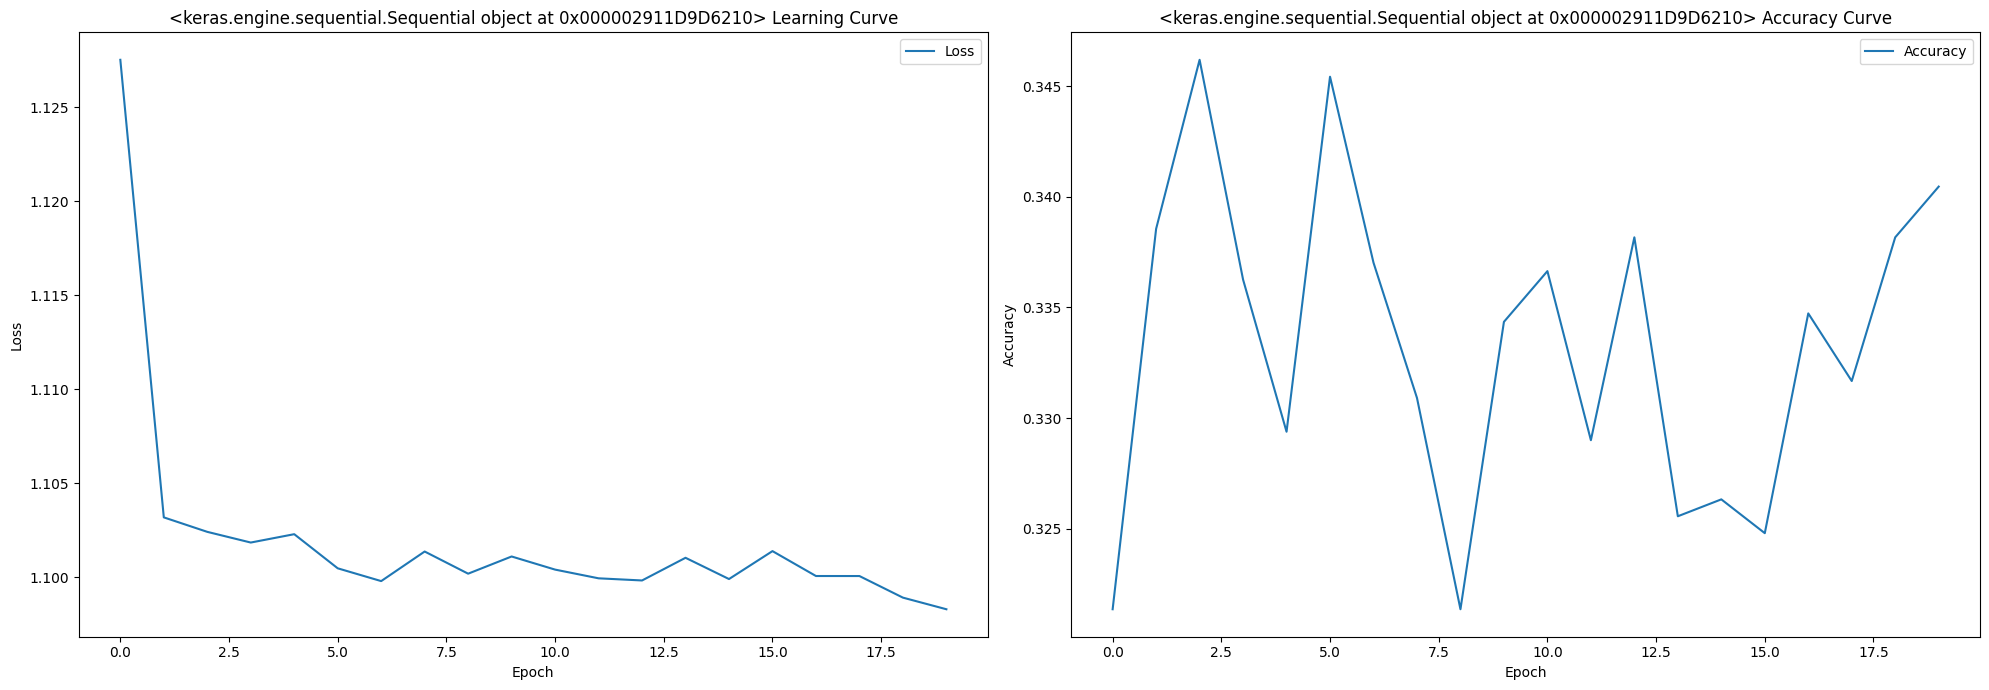

In [16]:
import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name, ax):
    ax.plot(history.history['loss'], label='Loss')
    ax.set_title(f'{model_name} Learning Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

def plot_accuracy_curves(history, model_name, ax):
    ax.plot(history.history['accuracy'], label='Accuracy')
    ax.set_title(f'{model_name} Accuracy Curve')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()

fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history1, model1, axs[0])
plot_accuracy_curves(history1, model1, axs[1])

plt.tight_layout()
plt.show()

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

In [18]:
X_pca_reduced = pca.fit_transform(X)

In [19]:
X_pca_reduced.shape

(3275, 26)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

In [21]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten())
for layer in range(10):
    model2.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))
model2.add(tf.keras.layers.Dense(3, activation="softmax"))

In [22]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [23]:
history2 = model2.fit(X_train ,  y_train, epochs=30)

Epoch 1/30
82/82 [==============================] - 1s 985us/step - loss: 1.1372 - accuracy: 0.3401
Epoch 2/30
82/82 [==============================] - 0s 936us/step - loss: 1.0990 - accuracy: 0.3649
Epoch 3/30
82/82 [==============================] - 0s 973us/step - loss: 1.0868 - accuracy: 0.3950
Epoch 4/30
82/82 [==============================] - 0s 1ms/step - loss: 1.0798 - accuracy: 0.4214
Epoch 5/30
82/82 [==============================] - 0s 1ms/step - loss: 1.0711 - accuracy: 0.4263
Epoch 6/30
82/82 [==============================] - 0s 1ms/step - loss: 1.0642 - accuracy: 0.4561
Epoch 7/30
82/82 [==============================] - 0s 1ms/step - loss: 1.0538 - accuracy: 0.4634
Epoch 8/30
82/82 [==============================] - 0s 1ms/step - loss: 1.0458 - accuracy: 0.4698
Epoch 9/30
82/82 [==============================] - 0s 1ms/step - loss: 1.0345 - accuracy: 0.5027
Epoch 10/30
82/82 [==============================] - 0s 1ms/step - loss: 1.0260 - accuracy: 0.5023
Epoch 11/30
8

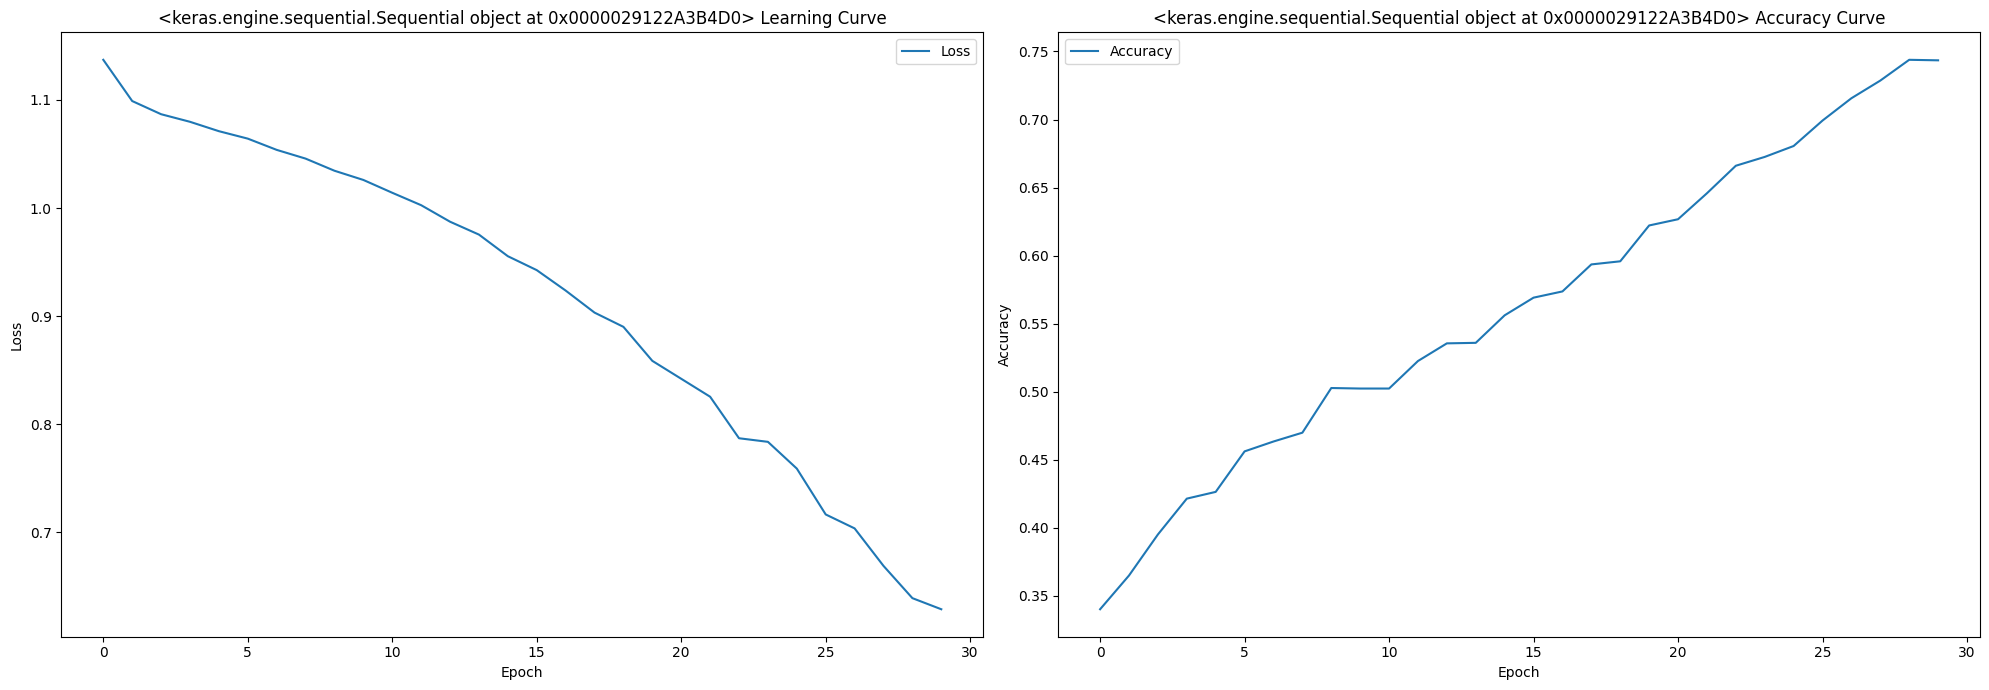

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))  
plot_learning_curves(history2, model2, axs[0])
plot_accuracy_curves(history2, model2, axs[1])

plt.tight_layout()
plt.show()